In [1]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

# Monte Carlo - Peddle Game

Now we have a discrete system who we, randomly, could go to up, right, down or left. If the peddle are in the boundary and the path-random send out side it should stay in the same place. All the possibilites is iqual.

In [2]:
def matrix(L):
    #neighbor #--------------------#
    neighbor, count  = np.zeros((L,L),dtype=int), 0
    for i in range(L):
        for j in range(L):
            neighbor[i,j] = count
            count +=1
    #neighbor #--------------------#
    return neighbor
matrix(3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [3]:
def Peddle(L, t_max, l=0, c=0, t=0): #"L" gives the size; "t_max" how much time it has trasition; 
                                     #"l,c" gives the cell that it'll start and "t"is the time count
    neighbor = matrix(L) #Matrix neighbor #--------------------#
    
    maping = np.zeros(t_max+1,dtype=int)
    maping[0] = neighbor[l,c]          
    
    while t < t_max:
        new = random.sample(['UP','DOWN','LEFT','RIGHT'],1)[0]
        if  new == 'UP' and l != 0:
            l = l-1
        if  new == 'DOWN' and l != L-1:
            l = l+1
        if  new == 'LEFT' and c != 0:
            c = c-1
        if  new == 'RIGHT' and c != L-1:
            c = c+1
        t += 1
        maping[t] = neighbor[l,c]  
    
    value , times = np.unique(maping, return_counts=True)
    VT = dict(zip(value , times))
    return VT
Peddle(L=3, t_max=5)

{0: 2, 3: 4}

# Anbalanced - Peddle Game TERMINAR

Anbalanced case that gives different transitions proababilits to change places.

In [4]:


histo = [0, 0, 0, 0, 0, 0, 0, 0, 0]
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
weight = [3.0, 0.5, 1.0, 0.5, 1.0, 0.5, 2.0, 0.5, 1.0]
pos = 8
n_iter = 1000000
for iter in range(n_iter):
    new_pos = neighbor[pos][random.randint(0, 3)]
    if random.random() < weight[new_pos] / weight[pos]:
        pos = new_pos
    histo[pos] += 1 

norm = sum(weight)
print ('comparison:  weight, histogram')
for k in range(9): 
    print ('site: ', k,' weight: ', weight[k], ' histo: ', norm * histo[k] / float(n_iter))

comparison:  weight, histogram
site:  0  weight:  3.0  histo:  2.98842
site:  1  weight:  0.5  histo:  0.49818
site:  2  weight:  1.0  histo:  0.99058
site:  3  weight:  0.5  histo:  0.49764
site:  4  weight:  1.0  histo:  1.00536
site:  5  weight:  0.5  histo:  0.50136
site:  6  weight:  2.0  histo:  2.01145
site:  7  weight:  0.5  histo:  0.50283
site:  8  weight:  1.0  histo:  1.00418


# Peddle Game Multirun and Probabilits

##-------------------------------------------------------------------------

This gige the last position for N(repetition) cases that you want for time!
##-------------------------------------------------------------------------

In [120]:
def Peddle_N(L, t_max, repetition, l=0, c=0, t=0): 
    neighbor, lin, col = matrix(L), l, c #lin and col represent the condition that start all repetition in the same site    
    
    allmaping = np.zeros((repetition,t_max+1))
    #cordenates = np.zeros((repetition,2))
    #--------------
    for i in range(repetition):
        maping = np.zeros(t_max+1,dtype=int) #it'll save all path in order 
        maping[0] = neighbor[l,c] # save the first position in this case neighbor[0,0] = 0 
        #--------------
        while t < t_max:
            new = random.sample(['UP','DOWN','LEFT','RIGHT'],1)[0]
            if  new == 'UP' and l != 0:
                l = l-1
            if  new == 'DOWN' and l != L-1:
                l = l+1
            if  new == 'LEFT' and c != 0:
                c = c-1
            if  new == 'RIGHT' and c != L-1:
                c = c+1
            t += 1
            maping[t] = neighbor[l,c]
        #--------------
        #cordenates[i] = [l,c]
        allmaping[i] = maping
        l, c, t = lin, col, 0
    #--------------

    value , times = np.unique(allmaping[:,t_max], return_counts=True)
    
    return value, times, times/repetition
Peddle_N(L=3, t_max=3, repetition=3)


(array([0., 1., 3.]),
 array([1, 1, 1]),
 array([0.33333333, 0.33333333, 0.33333333]))

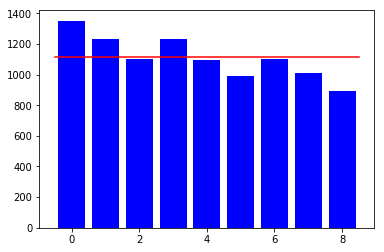

0.3801712989807129

In [126]:
def graf_histbar(L, t_max, repetition, l=0, c=0, t=0):
    ini = time.time()
    peddle = Peddle_N(L, t_max, repetition, l=0, c=0, t=0)
    #print(peddle)
    plt.bar(peddle[0], peddle[1], color='b')
    plt.plot([-.5,L*L-0.5],[repetition/(L*L),repetition/(L*L)], 'red')
    #plt.ylim(top=1)
    plt.show()
    fim = time.time()
    return fim-ini
graf_histbar(L=3, t_max=9, repetition=10000, l=0, c=0, t=0)

[[0.37499 0.1865  0.06287]
 [0.18614 0.12586 0.     ]
 [0.06364 0.      0.     ]]


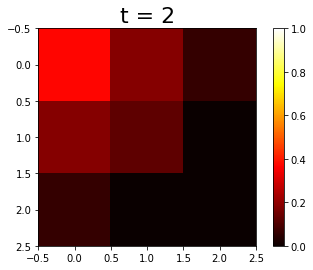

0.8475849628448486

In [119]:
def graf_histMat(L, t_max, repetition, l=0, c=0, t=0):
    ini = time.time()
    almostM = np.zeros(L*L)
    M = np.zeros((L,L))
    peddle = Peddle_N(L, t_max, repetition, l=0, c=0, t=0)
    value, prob = peddle[0], peddle[2]
    
    for i, j in enumerate(value):
        almostM[int(j)] = prob[i]
    
    M = almostM.reshape((L, L)) 
    print(M)           

    plt.imshow(M, interpolation='nearest', vmin=0.0, vmax=1.0)
    plt.set_cmap('hot')
    plt.colorbar()
    plt.title('t = '+str(t_max),fontsize=22)
    #plt.savefig('3x3_pebble_run_'+str(t_max)+'.png')
    plt.show()
    fim = time.time()
    return fim-ini
graf_histMat(L=3, t_max=2, repetition=100000, l=0, c=0, t=0)

# Peddle Game - the probability flows

In [ ]:
def Peddle_N(L, t_max, repetition, l=0, c=0, t=0): 
    neighbor, lin, col = matrix(L), l, c #lin and col represent the condition that start all repetition in the same site    
    
    allmaping = np.zeros((repetition,t_max+1))
    #cordenates = np.zeros((repetition,2))
    #--------------
    for i in range(repetition):
        maping = np.zeros(t_max+1,dtype=int) #it'll save all path in order 
        maping[0] = neighbor[l,c] # save the first position in this case neighbor[0,0] = 0 
        #--------------
        while t < t_max:
            new = random.sample(['UP','DOWN','LEFT','RIGHT'],1)[0]
            if  new == 'UP' and l != 0:
                l = l-1
            if  new == 'DOWN' and l != L-1:
                l = l+1
            if  new == 'LEFT' and c != 0:
                c = c-1
            if  new == 'RIGHT' and c != L-1:
                c = c+1
            t += 1
            maping[t] = neighbor[l,c]
        #--------------
        #cordenates[i] = [l,c]
        allmaping[i] = maping
        l, c, t = lin, col, 0
    #--------------

    value , times = np.unique(allmaping[:,t_max], return_counts=True)
    
    return value, times, times/repetition
Peddle_N(L, t_max, repetition, l=0, c=0, t=0)